# Objetivo:
Utilizar modelos de aprendizado profundo pré-treinados em PyTorch para classificar imagens de raios-X torácicos em duas categorias: normais ou com pneumonia, utilizando um banco de dados obtido através da API do Kaggle.

### Subobjetivos:

- Aquisição de dados: Utilizar a API do Kaggle para obter um conjunto de dados contendo imagens de raios-X torácicos com anotações de pneumonia.

- Pré-processamento: Redimensionar e normalizar as imagens para se adequarem à entrada dos modelos pré-treinados.

- Seleção de modelos pré-treinados: Escolher modelos de aprendizado profundo pré-treinados..

- Adaptação do modelo: Modificar a camada final da rede pré-treinada para se adequar ao problema de classificação binária de raios-X torácicos.

- Treinamento do classificador: Utilizar os recursos aprendidos pelo modelo pré-treinado para treinar apenas a camada de classificação final no conjunto de dados de raios-X.

- Avaliação do modelo: Avaliar o desempenho do modelo utilizando métricas como acurácia, precisão, recall e F1-score. Realizar análises de erros para entender as principais fontes de falha do modelo.

### Dificuldades:

- Transferência de conhecimento: Adaptação dos modelos pré-treinados para um problema específico exige ajustes cuidadosos para garantir que eles sejam eficazes.

- Tamanho do conjunto de dados: Mesmo com modelos pré-treinados, um conjunto de dados pequeno pode levar a problemas de generalização e overfitting.

- Métricas e avaliação: Avaliar como o modelo se comporta em dados de raios-X torácicos específicos, em vez do conjunto de dados de treinamento original.

- Escolha do modelo pré-treinado.

- Interpretação de resultados: Modelos pré-treinados podem ser caixas pretas, dificultando a interpretação de suas decisões em contextos clínicos.

- Comparar os resultados dos modelos pré-treinados é desafiador.

- Necessidade de recursos computacionais: Embora os modelos pré-treinados economizem tempo de treinamento, ainda pode ser necessário recursos computacionais consideráveis para ajustes finos e avaliação.

# Projeto:

In [1]:
from google.colab import files

files.upload()
# Abrirá um seletor de arquivos para fazer upload do arquivo JSON com seu username e key do kaggle

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!pip install kaggle

mkdir ~/.kaggle: Cria um diretório chamado .kaggle no diretório principal do usuário, se ele ainda não existir. O ~ representa o diretório principal do usuário.

mv kaggle.json ~/.kaggle/: Move um arquivo chamado kaggle.json para o diretório .kaggle que foi criado anteriormente. Isso pressupõe que o arquivo kaggle.json já está presente no diretório atual.

chmod 600 ~/.kaggle/kaggle.json: Altera as permissões do arquivo kaggle.json para garantir que apenas o proprietário do arquivo tenha permissão de leitura e escrita. Isso ajuda a proteger suas credenciais, evitando que outros usuários acessem suas informações de autenticação.

Geralmente, esses comandos são usados quando você deseja configurar suas credenciais do Kaggle para autenticar-se com a API do Kaggle usando a linha de comando.

In [3]:
# Configurar as credenciais da API do Kaggle de forma segura
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Carregando as imagens
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:55<00:00, 21.7MB/s]
100% 2.29G/2.29G [01:55<00:00, 21.3MB/s]


In [5]:
# Descompactando o arquivo zip
!unzip chest-xray-pneumonia.zip >/dev/null

In [6]:
# Procurando imagens que podem ter sido corrompidas
!pip install Pillow
import os
from PIL import Image

def corrupted(dir):
  directory = dir

  corrupted_images = []

  for filename in os.listdir(directory):
      if filename.endswith(".jpeg") or filename.endswith(".png"):
          file_path = os.path.join(directory, filename)
          try:
              img = Image.open(file_path)
              img.verify()  # Verifica a integridade da imagem
          except (IOError, SyntaxError) as e:
              print(f"A imagem {filename} está corrompida: {e}")
              corrupted_images.append(filename)

  print("Imagens corrompidas:", corrupted_images)

  image_count = 0

  for filename in os.listdir(dir):
      if filename.endswith(".jpeg") or filename.endswith(".png"):
          image_count += 1
          file_path = os.path.join(directory, filename)
          size = os.path.getsize(file_path)
          #print(f"Imagem: {filename}, Tamanho: {size} bytes")

  print(f"Total de imagens no diretório {item}: {image_count}")

In [7]:
# Procurando imagens corrompidas em cada diretório e o total em cada diretório
lista=['/content/chest_xray/test/NORMAL', '/content/chest_xray/test/PNEUMONIA','/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA','/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA']

for item in lista:
  print(f'Diretório {item}')
  corrupted(item)
  print('-'*20)

Diretório /content/chest_xray/test/NORMAL
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/test/NORMAL: 234
--------------------
Diretório /content/chest_xray/test/PNEUMONIA
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/test/PNEUMONIA: 390
--------------------
Diretório /content/chest_xray/train/NORMAL
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/train/NORMAL: 1341
--------------------
Diretório /content/chest_xray/train/PNEUMONIA
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/train/PNEUMONIA: 3875
--------------------
Diretório /content/chest_xray/val/NORMAL
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/val/NORMAL: 8
--------------------
Diretório /content/chest_xray/val/PNEUMONIA
Imagens corrompidas: []
Total de imagens no diretório /content/chest_xray/val/PNEUMONIA: 8
--------------------


In [8]:
# Exibindo algumas imagens de exemplo

import os
from PIL import Image

def print_images(directory, num_images):
    print(f"Diretório {directory}")
    print("--------------------")

    image_count = 0
    for filename in os.listdir(directory):
        if image_count >= num_images:
            break

        if filename.endswith(".jpeg") or filename.endswith(".png"):
            image_count += 1
            file_path = os.path.join(directory, filename)
            img = Image.open(file_path)
            print(f"Nome da imagem: {filename}")
            display(img)  # Exibir a imagem usando o Jupyter Notebook

    print("\n")

num_images_to_print = 1

for dir_path in lista:
    image_files = [filename for filename in os.listdir(dir_path) if filename.endswith(".jpeg") or filename.endswith(".png")]
    print_images(dir_path, min(num_images_to_print, len(image_files)))

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Redimensionando as imagens para 224x224 e normalizando
import numpy as np

destino=['/content/test_resized/NORMAL','/content/test_resized/PNEUMONIA','/content/train_resized/NORMAL','/content/train_resized/PNEUMONIA','/content/val_resized/NORMAL','/content/val_resized/PNEUMONIA']

for source_directory, destination_directory in zip(lista, destino):
    # Criação da pasta de destino
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Tamanho desejado
    target_size = (224, 224)

    # Iterar sobre as imagens no diretório de origem
    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Redimensionamento
            resized_img = img.resize(target_size, Image.LANCZOS)

            # Normalização
            normalized_img = resized_img.convert("RGB")
            normalized_img = np.array(normalized_img) / 255.0  # Convertendo para array NumPy e normalizando

            destination_path = os.path.join(destination_directory, filename)
            normalized_img = Image.fromarray((normalized_img * 255).astype(np.uint8))  # Convertendo de volta para imagem PIL
            normalized_img.save(destination_path)

    print(f"Imagens redimensionadas e normalizadas, salvas na pasta {destination_directory}.")

Imagens redimensionadas e normalizadas, salvas na pasta /content/test_resized/NORMAL.
Imagens redimensionadas e normalizadas, salvas na pasta /content/test_resized/PNEUMONIA.
Imagens redimensionadas e normalizadas, salvas na pasta /content/train_resized/NORMAL.
Imagens redimensionadas e normalizadas, salvas na pasta /content/train_resized/PNEUMONIA.
Imagens redimensionadas e normalizadas, salvas na pasta /content/val_resized/NORMAL.
Imagens redimensionadas e normalizadas, salvas na pasta /content/val_resized/PNEUMONIA.


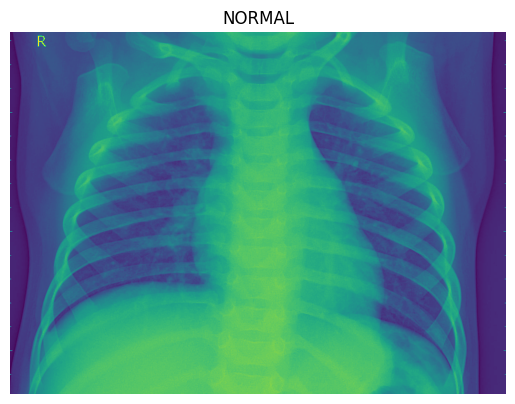

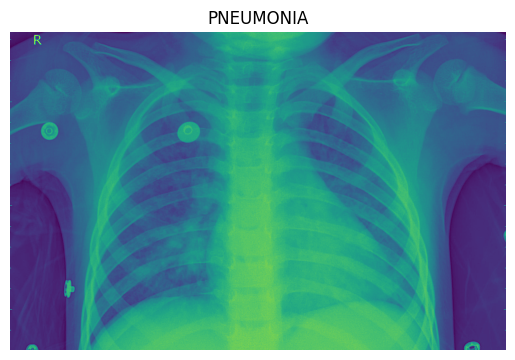

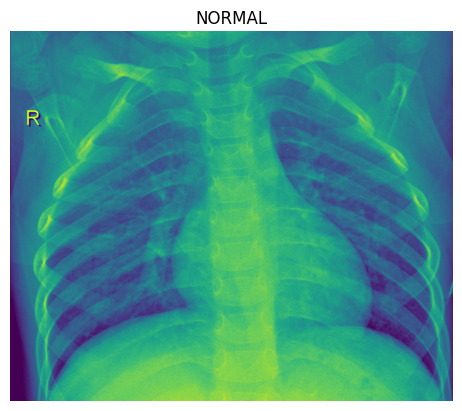

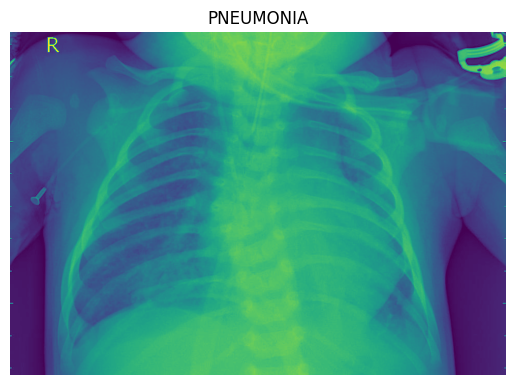

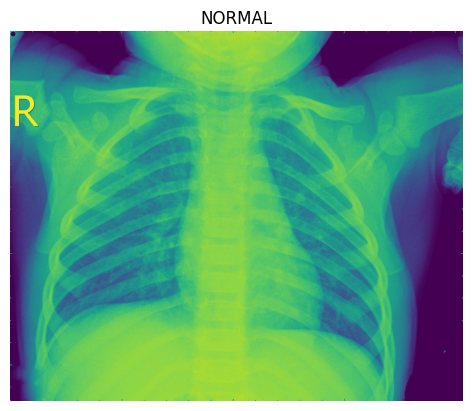

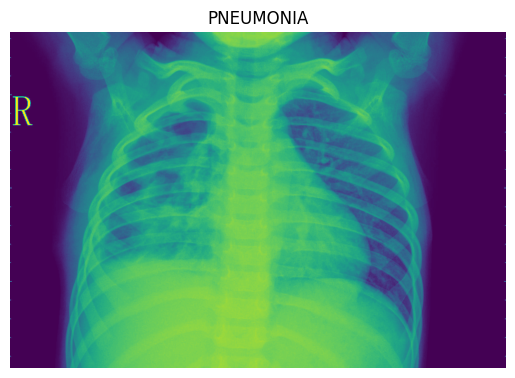

In [10]:
# Imprimindo imagens redimensionadas e normalizadas com suas respectivas labels
import matplotlib.pyplot as plt

# Rótulos correspondentes
labels = ['NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA']

# Função para exibir imagens
def show_image_with_label(image_path, label):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

# Exibir uma imagem de cada diretório com o respectivo rótulo
for folder, label in zip(lista, labels):
    image_file = os.listdir(folder)[0]  # Pega a primeira imagem do diretório
    image_path = os.path.join(folder, image_file)
    show_image_with_label(image_path, label)

In [22]:
# Organizando os dados de treinamento e teste

import os
import torch
import torchvision
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms, models

# Caminhos para os dados
train_data_dir = '/content/train_resized'
test_data_dir = '/content/test_resized'

# Transformações para treinamento e teste
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        transforms.ToTensor()
    ]),
}

# Carregar dados de treinamento e teste
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=data_transforms['test'])

# Carregadores de dados
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Obter as classes e seus índices
class_names = train_dataset.classes
class_indices = train_dataset.class_to_idx

# Rótulos de teste filtrados
filtered_test_labels = test_dataset.targets

print("Classes:", class_names)
print("Class Indices:", class_indices)
print('')

Classes: ['NORMAL', 'PNEUMONIA']
Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}



In [21]:
# Função de treinamento, teste e validação
import time
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def treinamento(model, epocas, train_loader, test_loader, filtered_test_labels):
    # Mova o modelo para a GPU, se disponível
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Otimizador e a função de perda
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Número de épocas de treinamento
    num_epochs = epocas

    # Crie listas para armazenar as métricas de Loss e Accuracy
    loss_history = []
    accuracy_history = []

    # Colocar o modelo em modo de treinamento
    model.train()

    # Iniciar contagem do tempo total de treinamento
    start_time = time.time()

    # Loop de treinamento
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for images, labels in train_loader:
            # Mover dados para a GPU
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zerar os gradientes acumulados
            outputs = model(images)  # Passar as imagens pelo modelo
            loss = criterion(outputs, labels)  # Calcular a perda
            loss.backward()  # Retropropagação
            optimizer.step()  # Atualizar os pesos do modelo
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions / total_samples
        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time

        # Adicionando as métricas à lista de histórico
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f} - Time: {epoch_duration:.2f} seconds")

    # Tempo total de treinamento
    total_training_time = time.time() - start_time
    print(f"Total training time: {total_training_time:.2f} seconds")

    print("Completed training")
    print('')
    # Plotar gráfico de Loss (se tiver o Plotly instalado)
    try:
        import plotly.express as px
        loss_fig = px.line(x=list(range(1, num_epochs+1)), y=loss_history, title="Loss Over Epochs")
        loss_fig.update_xaxes(title="Epoch")
        loss_fig.update_yaxes(title="Loss")
        loss_fig.show()
    except ImportError:
        print("Plotly not installed. Skipping loss plot.")

    # Plotar gráfico de Accuracy (se tiver o Plotly instalado)
    try:
        accuracy_fig = px.line(x=list(range(1, num_epochs+1)), y=accuracy_history, title="Accuracy Over Epochs")
        accuracy_fig.update_xaxes(title="Epoch")
        accuracy_fig.update_yaxes(title="Accuracy")
        accuracy_fig.show()
    except ImportError:
        print("Plotly not installed. Skipping accuracy plot.")

    print('')

    # Modelo em modo de avaliação
    model.eval()

    # Lista para armazenar as previsões do modelo
    all_predictions = []

    # Loop de avaliação
    for images, labels in test_loader:
        # Mover dados para a GPU (se estiver usando GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Obter as previsões do modelo
        with torch.no_grad():
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())  # Mover as previsões para a CPU

    # Converter as previsões para um array numpy
    all_predictions = np.array(all_predictions)

    # Calcular métricas de avaliação
    accuracy = accuracy_score(filtered_test_labels, all_predictions)
    precision = precision_score(filtered_test_labels, all_predictions, average='weighted')
    recall = recall_score(filtered_test_labels, all_predictions, average='weighted')
    f1 = f1_score(filtered_test_labels, all_predictions, average='weighted')
    conf_matrix = confusion_matrix(filtered_test_labels, all_predictions)

    # Imprimir as métricas
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Gerar o relatório de classificação
    class_names = ['class_0', 'class_1']  # Classes
    class_report = classification_report(filtered_test_labels, all_predictions, target_names=class_names)
    print("\nClassification Report:")
    print(class_report)

        # Movendo os dados para a GPU se disponível
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Definir o modelo escolhido
    model.eval()  # Modelo em modo de avaliação

    # Caminho para os dados de validação
    val_data_dir = '/content/val_resized'

    # Transformações para validação
    val_transforms = transforms.Compose([
        transforms.ToTensor()
    ])

    # Carregar dados de validação
    val_dataset = datasets.ImageFolder(root=val_data_dir, transform=val_transforms)
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=1)

    # Definir as classes
    class_names = val_dataset.classes

    # Fazer previsões nas imagens de validação
    for inputs, labels in val_loader:
        inputs = inputs.to(device)  # Mover as entradas para a GPU, se disponível
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        true_class = class_names[labels.item()]

        print(f"Predicted class: {predicted_class}, True class: {true_class}")

# Modelos Pré-treinados

## ResNet
ResNet: Uma série de arquiteturas profundas, como ResNet18, ResNet34, ResNet50, etc. São conhecidas por suas conexões residuais que permitem o treinamento de redes profundas com eficácia.

In [13]:
# Quantidade de treinamento
epocas = 10

In [14]:
chosen_model = models.resnet18(pretrained=True)

# Modificar a camada de saída
num_classes = 2  # Normal e Pneumonia
num_ftrs = chosen_model.fc.in_features
chosen_model.fc = torch.nn.Linear(num_ftrs, num_classes)

# Chamar a função de treinamento
treinamento(chosen_model, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 218MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current 

Epoch [1/10] - Loss: 0.1191 - Accuracy: 0.9563 - Time: 25.97 seconds
Epoch [2/10] - Loss: 0.0603 - Accuracy: 0.9778 - Time: 17.76 seconds
Epoch [3/10] - Loss: 0.0419 - Accuracy: 0.9856 - Time: 16.75 seconds
Epoch [4/10] - Loss: 0.0221 - Accuracy: 0.9929 - Time: 16.37 seconds
Epoch [5/10] - Loss: 0.0319 - Accuracy: 0.9877 - Time: 16.60 seconds
Epoch [6/10] - Loss: 0.0247 - Accuracy: 0.9904 - Time: 16.71 seconds
Epoch [7/10] - Loss: 0.0167 - Accuracy: 0.9939 - Time: 17.06 seconds
Epoch [8/10] - Loss: 0.0331 - Accuracy: 0.9872 - Time: 16.70 seconds
Epoch [9/10] - Loss: 0.0110 - Accuracy: 0.9954 - Time: 16.75 seconds
Epoch [10/10] - Loss: 0.0109 - Accuracy: 0.9962 - Time: 17.73 seconds
Total training time: 178.40 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.7067
Precision: 0.8004
Recall: 0.7067
F1-score: 0.6404

Confusion Matrix:
[[ 51 183]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.22      0.36       234
     class_1       0.68      1.00      0.81       390

    accuracy                           0.71       624
   macro avg       0.84      0.61      0.58       624
weighted avg       0.80      0.71      0.64       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True

## VGG
VGG: Uma arquitetura de redes profundas com camadas convolucionais muito pequenas (3x3) em toda a rede. Exemplos incluem VGG16 e VGG19.

In [23]:
vgg16 = models.vgg16(pretrained=True)
num_ftrs = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_ftrs, num_classes)

treinamento(vgg16, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



Epoch [1/10] - Loss: 0.5482 - Accuracy: 0.8029 - Time: 76.68 seconds
Epoch [2/10] - Loss: 0.2896 - Accuracy: 0.8953 - Time: 76.40 seconds
Epoch [3/10] - Loss: 0.1834 - Accuracy: 0.9293 - Time: 76.66 seconds
Epoch [4/10] - Loss: 0.1450 - Accuracy: 0.9496 - Time: 76.63 seconds
Epoch [5/10] - Loss: 1.4138 - Accuracy: 0.7270 - Time: 75.92 seconds
Epoch [6/10] - Loss: 0.3950 - Accuracy: 0.8181 - Time: 75.66 seconds
Epoch [7/10] - Loss: 0.2261 - Accuracy: 0.9147 - Time: 75.93 seconds
Epoch [8/10] - Loss: 0.1603 - Accuracy: 0.9394 - Time: 75.84 seconds
Epoch [9/10] - Loss: 0.1332 - Accuracy: 0.9473 - Time: 75.77 seconds
Epoch [10/10] - Loss: 0.1120 - Accuracy: 0.9584 - Time: 76.09 seconds
Total training time: 761.56 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.7500
Precision: 0.7812
Recall: 0.7500
F1-score: 0.7198

Confusion Matrix:
[[ 91 143]
 [ 13 377]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.88      0.39      0.54       234
     class_1       0.72      0.97      0.83       390

    accuracy                           0.75       624
   macro avg       0.80      0.68      0.68       624
weighted avg       0.78      0.75      0.72       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True cl

## AlexNet
AlexNet: Um dos primeiros modelos a ganhar popularidade, contém camadas convolucionais seguidas por camadas totalmente conectadas. Foi usado para ganhar a competição ImageNet em 2012.

In [24]:
alexnet = models.alexnet(pretrained=True)
num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, num_classes)

treinamento(alexnet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 118MB/s] 
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller 

Epoch [1/10] - Loss: 0.6046 - Accuracy: 0.7389 - Time: 10.46 seconds
Epoch [2/10] - Loss: 0.5712 - Accuracy: 0.7429 - Time: 10.22 seconds
Epoch [3/10] - Loss: 0.5715 - Accuracy: 0.7429 - Time: 9.34 seconds
Epoch [4/10] - Loss: 0.5728 - Accuracy: 0.7429 - Time: 10.01 seconds
Epoch [5/10] - Loss: 0.5726 - Accuracy: 0.7429 - Time: 10.44 seconds
Epoch [6/10] - Loss: 0.5714 - Accuracy: 0.7429 - Time: 10.35 seconds
Epoch [7/10] - Loss: 0.5724 - Accuracy: 0.7429 - Time: 10.15 seconds
Epoch [8/10] - Loss: 0.5730 - Accuracy: 0.7429 - Time: 9.35 seconds
Epoch [9/10] - Loss: 0.5742 - Accuracy: 0.7429 - Time: 10.39 seconds
Epoch [10/10] - Loss: 0.5720 - Accuracy: 0.7429 - Time: 10.34 seconds
Total training time: 101.06 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.6250
Precision: 0.3906
Recall: 0.6250
F1-score: 0.4808

Confusion Matrix:
[[  0 234]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       234
     class_1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA


## DenseNet
DenseNet: Diferentemente das arquiteturas tradicionais, o DenseNet conecta cada camada a todas as camadas subsequentes, o que promove um fluxo eficiente de informações.

In [25]:
densenet = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
num_ftrs = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_ftrs, num_classes)

treinamento(densenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [1/10] - Loss: 0.1032 - Accuracy: 0.9595 - Time: 54.12 seconds
Epoch [2/10] - Loss: 0.0666 - Accuracy: 0.9757 - Time: 54.00 seconds
Epoch [3/10] - Loss: 0.0599 - Accuracy: 0.9758 - Time: 54.09 seconds
Epoch [4/10] - Loss: 0.0423 - Accuracy: 0.9839 - Time: 53.82 seconds
Epoch [5/10] - Loss: 0.0355 - Accuracy: 0.9852 - Time: 54.14 seconds
Epoch [6/10] - Loss: 0.0464 - Accuracy: 0.9829 - Time: 54.03 seconds
Epoch [7/10] - Loss: 0.0385 - Accuracy: 0.9858 - Time: 54.34 seconds
Epoch [8/10] - Loss: 0.0315 - Accuracy: 0.9877 - Time: 54.02 seconds
Epoch [9/10] - Loss: 0.0346 - Accuracy: 0.9879 - Time: 53.75 seconds
Epoch [10/10] - Loss: 0.0283 - Accuracy: 0.9904 - Time: 53.94 seconds
Total training time: 540.27 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.9071
Precision: 0.9084
Recall: 0.9071
F1-score: 0.9057

Confusion Matrix:
[[191  43]
 [ 15 375]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      0.82      0.87       234
     class_1       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class

## MobileNet
MobileNet: Projetada para eficiência computacional, essa arquitetura usa operações de convolução separável e camadas de ponto de entrada para reduzir a carga computacional.

In [26]:
mobilenet = models.mobilenet_v2(pretrained=True)
num_ftrs = mobilenet.classifier[1].in_features
mobilenet.classifier[1] = nn.Linear(num_ftrs, num_classes)

treinamento(mobilenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 66.3MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, whi

Epoch [1/10] - Loss: 0.1084 - Accuracy: 0.9599 - Time: 20.80 seconds
Epoch [2/10] - Loss: 0.0450 - Accuracy: 0.9822 - Time: 21.13 seconds
Epoch [3/10] - Loss: 0.0449 - Accuracy: 0.9822 - Time: 21.03 seconds
Epoch [4/10] - Loss: 0.0264 - Accuracy: 0.9912 - Time: 21.08 seconds
Epoch [5/10] - Loss: 0.0336 - Accuracy: 0.9885 - Time: 21.00 seconds
Epoch [6/10] - Loss: 0.0248 - Accuracy: 0.9914 - Time: 20.73 seconds
Epoch [7/10] - Loss: 0.0209 - Accuracy: 0.9929 - Time: 21.26 seconds
Epoch [8/10] - Loss: 0.0230 - Accuracy: 0.9902 - Time: 21.01 seconds
Epoch [9/10] - Loss: 0.0343 - Accuracy: 0.9868 - Time: 20.67 seconds
Epoch [10/10] - Loss: 0.0280 - Accuracy: 0.9914 - Time: 21.09 seconds
Total training time: 209.80 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8061
Precision: 0.8520
Recall: 0.8061
F1-score: 0.7853

Confusion Matrix:
[[113 121]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.48      0.65       234
     class_1       0.76      1.00      0.87       390

    accuracy                           0.81       624
   macro avg       0.88      0.74      0.76       624
weighted avg       0.85      0.81      0.79       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class

## EfficientNet
EfficientNet: Uma família de modelos otimizados em termos de desempenho e escalabilidade. O "B0" é o menor, enquanto os modelos maiores têm mais parâmetros e melhor desempenho.

In [27]:
!pip install efficientnet-pytorch

from efficientnet_pytorch import EfficientNet
# Definir o modelo EfficientNet-B0
efficientnet = EfficientNet.from_pretrained('efficientnet-b0')

num_ftrs = efficientnet._fc.in_features
efficientnet._fc = nn.Linear(num_ftrs, num_classes)

treinamento(efficientnet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=f1d4944ebfddda60fe49e1fbf588e2e176bfc47293c3c88346ba4e20dbe30f03
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:02<00:00, 10.6MB/s]

Loaded pretrained weights for efficientnet-b0



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [1/10] - Loss: 0.1190 - Accuracy: 0.9555 - Time: 37.52 seconds
Epoch [2/10] - Loss: 0.0399 - Accuracy: 0.9852 - Time: 36.87 seconds
Epoch [3/10] - Loss: 0.0301 - Accuracy: 0.9873 - Time: 37.32 seconds
Epoch [4/10] - Loss: 0.0288 - Accuracy: 0.9900 - Time: 37.15 seconds
Epoch [5/10] - Loss: 0.0185 - Accuracy: 0.9929 - Time: 36.93 seconds
Epoch [6/10] - Loss: 0.0233 - Accuracy: 0.9918 - Time: 37.28 seconds
Epoch [7/10] - Loss: 0.0169 - Accuracy: 0.9941 - Time: 36.93 seconds
Epoch [8/10] - Loss: 0.0111 - Accuracy: 0.9962 - Time: 36.85 seconds
Epoch [9/10] - Loss: 0.0073 - Accuracy: 0.9975 - Time: 37.04 seconds
Epoch [10/10] - Loss: 0.0026 - Accuracy: 0.9994 - Time: 36.84 seconds
Total training time: 370.74 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.7740
Precision: 0.8340
Recall: 0.7740
F1-score: 0.7426

Confusion Matrix:
[[ 93 141]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.40      0.57       234
     class_1       0.73      1.00      0.85       390

    accuracy                           0.77       624
   macro avg       0.87      0.70      0.71       624
weighted avg       0.83      0.77      0.74       624

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNE

## ResNeXt
ResNeXt: Construído sobre o conceito de "blocos de ativação", o ResNeXt aumenta a profundidade do modelo dividindo a entrada em várias vias e, em seguida, combinando os resultados.

In [28]:
resnext = models.resnext50_32x4d(pretrained=True)
num_ftrs = resnext.fc.in_features
resnext.fc = nn.Linear(num_ftrs, num_classes)

treinamento(resnext, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 64.1MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current syst

Epoch [1/10] - Loss: 0.1544 - Accuracy: 0.9423 - Time: 74.63 seconds
Epoch [2/10] - Loss: 0.0681 - Accuracy: 0.9751 - Time: 73.58 seconds
Epoch [3/10] - Loss: 0.0639 - Accuracy: 0.9762 - Time: 73.49 seconds
Epoch [4/10] - Loss: 0.0657 - Accuracy: 0.9747 - Time: 73.06 seconds
Epoch [5/10] - Loss: 0.0413 - Accuracy: 0.9843 - Time: 73.39 seconds
Epoch [6/10] - Loss: 0.0569 - Accuracy: 0.9778 - Time: 73.04 seconds
Epoch [7/10] - Loss: 0.0224 - Accuracy: 0.9923 - Time: 73.42 seconds
Epoch [8/10] - Loss: 0.0427 - Accuracy: 0.9856 - Time: 73.13 seconds
Epoch [9/10] - Loss: 0.0355 - Accuracy: 0.9868 - Time: 73.09 seconds
Epoch [10/10] - Loss: 0.0194 - Accuracy: 0.9935 - Time: 73.02 seconds
Total training time: 733.87 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.7772
Precision: 0.8325
Recall: 0.7772
F1-score: 0.7478

Confusion Matrix:
[[ 96 138]
 [  1 389]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.41      0.58       234
     class_1       0.74      1.00      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True

## SqueezeNet
SqueezeNet: Destinado a ser extremamente compacto, o SqueezeNet usa camadas de convolução 1x1 para reduzir o número de parâmetros, tornando-o adequado para dispositivos com recursos limitados.

In [29]:
squeezenet = models.squeezenet1_1(pretrained=True)
# Alterar a última camada para corresponder ao número de classes
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
squeezenet.num_classes = num_classes

treinamento(squeezenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid po

Epoch [1/10] - Loss: 0.4759 - Accuracy: 0.7864 - Time: 14.55 seconds
Epoch [2/10] - Loss: 0.2326 - Accuracy: 0.9118 - Time: 15.60 seconds
Epoch [3/10] - Loss: 0.1929 - Accuracy: 0.9268 - Time: 14.79 seconds
Epoch [4/10] - Loss: 0.1387 - Accuracy: 0.9486 - Time: 13.14 seconds
Epoch [5/10] - Loss: 0.0974 - Accuracy: 0.9670 - Time: 10.66 seconds
Epoch [6/10] - Loss: 0.1020 - Accuracy: 0.9594 - Time: 10.65 seconds
Epoch [7/10] - Loss: 0.0849 - Accuracy: 0.9705 - Time: 10.54 seconds
Epoch [8/10] - Loss: 0.0888 - Accuracy: 0.9672 - Time: 9.93 seconds
Epoch [9/10] - Loss: 0.0651 - Accuracy: 0.9762 - Time: 10.21 seconds
Epoch [10/10] - Loss: 0.0565 - Accuracy: 0.9801 - Time: 10.49 seconds
Total training time: 120.56 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8558
Precision: 0.8748
Recall: 0.8558
F1-score: 0.8476

Confusion Matrix:
[[149  85]
 [  5 385]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.97      0.64      0.77       234
     class_1       0.82      0.99      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.81      0.83       624
weighted avg       0.87      0.86      0.85       624

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, T

## ViT
O ViT é um modelo que aplica a arquitetura de transformadores, originalmente desenvolvida para tarefas de processamento de linguagem natural, a tarefas de visão computacional.

O ViT foi introduzido em um artigo intitulado "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale", publicado pela Google Research em 2020. Ele demonstrou resultados impressionantes em tarefas de classificação de imagens, apesar de adotar uma abordagem diferente das arquiteturas convolucionais tradicionais.

In [30]:
! pip install vit_pytorch
from vit_pytorch import ViT
# Escolher o modelo Vision Transformer (ViT)
vit = ViT(
    image_size=224,
    patch_size=32,
    num_classes=2,  # Normal e Pneumonia
    dim=768,
    depth=12,
    heads=12,
    mlp_dim=3072,
    channels=3
)

treinamento(vit, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [1/10] - Loss: 0.6737 - Accuracy: 0.7607 - Time: 47.52 seconds
Epoch [2/10] - Loss: 0.3572 - Accuracy: 0.8393 - Time: 46.95 seconds
Epoch [3/10] - Loss: 0.2927 - Accuracy: 0.8769 - Time: 46.80 seconds
Epoch [4/10] - Loss: 0.2690 - Accuracy: 0.8844 - Time: 46.73 seconds
Epoch [5/10] - Loss: 0.3226 - Accuracy: 0.8587 - Time: 47.01 seconds
Epoch [6/10] - Loss: 0.2801 - Accuracy: 0.8831 - Time: 46.89 seconds
Epoch [7/10] - Loss: 0.2483 - Accuracy: 0.8999 - Time: 47.07 seconds
Epoch [8/10] - Loss: 0.2496 - Accuracy: 0.9016 - Time: 46.73 seconds
Epoch [9/10] - Loss: 0.2507 - Accuracy: 0.8944 - Time: 46.68 seconds
Epoch [10/10] - Loss: 0.2397 - Accuracy: 0.8993 - Time: 46.63 seconds
Total training time: 469.01 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.6891
Precision: 0.7151
Recall: 0.6891
F1-score: 0.6335

Confusion Matrix:
[[ 56 178]
 [ 16 374]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.78      0.24      0.37       234
     class_1       0.68      0.96      0.79       390

    accuracy                           0.69       624
   macro avg       0.73      0.60      0.58       624
weighted avg       0.72      0.69      0.63       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class

# Resultados:

### Resultados dos modelos com 10 épocas de treinamento:

resnet:
Total training time: 178.40 seconds
Accuracy: 0.7067
Precision: 0.8004
Recall: 0.7067
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.22      0.36       234
     class_1       0.68      1.00      0.81       390

    accuracy                           0.71       624
   macro avg       0.84      0.61      0.58       624
weighted avg       0.80      0.71      0.64       624

VGG:
Total training time: 761.56 seconds
Accuracy: 0.7500
Precision: 0.7812
Recall: 0.7500
F1-score: 0.7198
Classification Report:
              precision    recall  f1-score   support

     class_0       0.88      0.39      0.54       234
     class_1       0.72      0.97      0.83       390

    accuracy                           0.75       624
   macro avg       0.80      0.68      0.68       624
weighted avg       0.78      0.75      0.72       624

alexnet:
Total training time: 101.06 seconds
Accuracy: 0.6250
Precision: 0.3906
Recall: 0.6250
F1-score: 0.4808
Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       234
     class_1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624

densenet:
Total training time: 540.27 seconds
Accuracy: 0.9071
Precision: 0.9084
Recall: 0.9071
F1-score: 0.9057
Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      0.82      0.87       234
     class_1       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624

mobilnet:
Total training time: 209.80 seconds
Accuracy: 0.8061
Precision: 0.8520
Recall: 0.8061
F1-score: 0.7853
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.48      0.65       234
     class_1       0.76      1.00      0.87       390

    accuracy                           0.81       624
   macro avg       0.88      0.74      0.76       624
weighted avg       0.85      0.81      0.79       624

efficientNet:
Total training time: 370.74 seconds
Accuracy: 0.7740
Precision: 0.8340
Recall: 0.7740
F1-score: 0.7426
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.40      0.57       234
     class_1       0.73      1.00      0.85       390

    accuracy                           0.77       624
   macro avg       0.87      0.70      0.71       624
weighted avg       0.83      0.77      0.74       624

resnext:
Total training time: 733.87 seconds
Accuracy: 0.7772
Precision: 0.8325
Recall: 0.7772
F1-score: 0.7478
Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.41      0.58       234
     class_1       0.74      1.00      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624

squeezenet:
Total training time: 120.56 seconds
Accuracy: 0.8558
Precision: 0.8748
Recall: 0.8558
F1-score: 0.8476
Classification Report:
              precision    recall  f1-score   support

     class_0       0.97      0.64      0.77       234
     class_1       0.82      0.99      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.81      0.83       624
weighted avg       0.87      0.86      0.85       624

Vit:
Total training time: 469.01 seconds
Accuracy: 0.6891
Precision: 0.7151
Recall: 0.6891
F1-score: 0.6335
Classification Report:
              precision    recall  f1-score   support

     class_0       0.78      0.24      0.37       234
     class_1       0.68      0.96      0.79       390

    accuracy                           0.69       624
   macro avg       0.73      0.60      0.58       624
weighted avg       0.72      0.69      0.63       624


# Os três melhores modelos:

- ResNet:

Acurácia: 0.7067
Precisão: 0.8004
Recall: 0.7067
F1-score: Não fornecido
Tempo total de treinamento: 178,40 segundos
Resumo: A ResNet alcançou uma boa acurácia, precisão e recall. No entanto, a falta do valor do F1-score dificulta uma avaliação completa de seu desempenho.
- DenseNet:

Acurácia: 0.9071
Precisão: 0.9084
Recall: 0.9071
F1-score: 0.9057
Tempo total de treinamento: 540,27 segundos
Resumo: A DenseNet teve um desempenho notável em todas as métricas, alcançando alta acurácia, precisão, recall e F1-score.
- SqueezeNet:

Acurácia: 0.8558
Precisão: 0.8748
Recall: 0.8558
F1-score: 0.8476
Tempo total de treinamento: 120,56 segundos
Resumo: A SqueezeNet também apresentou resultados fortes com alta acurácia, precisão, recall e F1-score, além de um tempo de treinamento relativamente curto.
Os 3 Melhores Modelos:
Com base nas métricas fornecidas e considerando que o F1-score para a ResNet não está disponível, os três melhores modelos:

- DenseNet: Alcançou a maior acurácia, precisão, recall e F1-score entre os modelos.
- SqueezeNet: Apresentou um desempenho sólido em todas as métricas e um tempo de treinamento relativamente curto.
- ResNet: Apesar de faltar o valor do F1-score, demonstrou boa acurácia e precisão, o que a torna uma candidata aos principais modelos.

## Gráficos com os resultados:

In [40]:
# Importando a biblioteca pandas
import pandas as pd

# Criando um dicionário com os resultados
resultados = {
    "Modelo": ["resnet", "VGG", "alexnet", "densenet", "mobilnet", "efficientNet", "resnext", "squeezenet", "Vit"],
    "Tempo de Treinamento (s)": [178.40, 761.56, 101.06, 540.27, 209.80, 370.74, 733.87, 120.56, 469.01],
    "Acurácia": [0.7067, 0.7500, 0.6250, 0.9071, 0.8061, 0.7740, 0.7772, 0.8558, 0.6891],
    "Precisão": [0.8004, 0.7812, 0.3906, 0.9084, 0.8520, 0.8340, 0.8325, 0.8748, 0.7151],
    "Recall": [0.7067, 0.7500, 0.6250, 0.9071, 0.8061, 0.7740, 0.7772, 0.8558, 0.6891],
    "F1-score": [0.6960, 0.7198, 0.4808, 0.9057, 0.7853, 0.7426, 0.7478, 0.8476, 0.6335]
}

# Criando um DataFrame a partir dos resultados
df = pd.DataFrame(resultados)
df

,Modelo,Tempo de Treinamento (s),Acurácia,Precisão,Recall,F1-score
0,resnet,178.40,0.7067,0.8004,0.7067,0.6960
1,VGG,761.56,0.7500,0.7812,0.7500,0.7198
2,alexnet,101.06,0.6250,0.3906,0.6250,0.4808
3,densenet,540.27,0.9071,0.9084,0.9071,0.9057
4,mobilnet,209.80,0.8061,0.8520,0.8061,0.7853
5,efficientNet,370.74,0.7740,0.8340,0.7740,0.7426
6,resnext,733.87,0.7772,0.8325,0.7772,0.7478
7,squeezenet,120.56,0.8558,0.8748,0.8558,0.8476
8,Vit,469.01,0.6891,0.7151,0.6891,0.6335


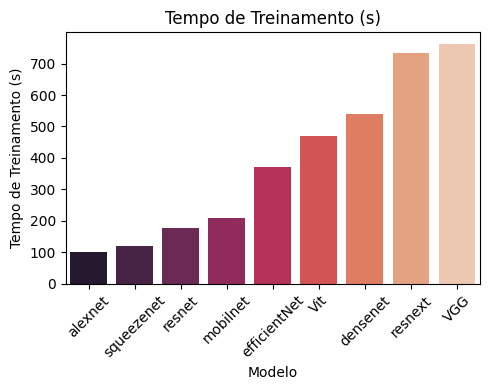

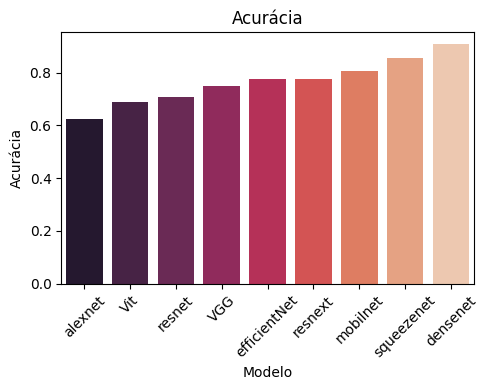

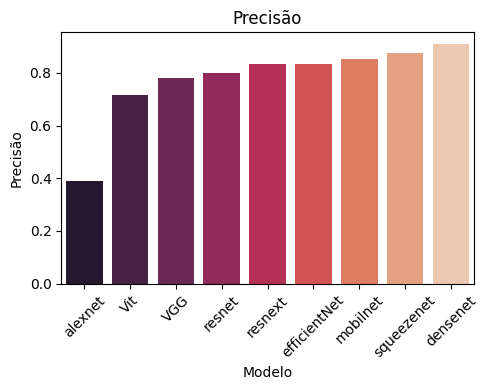

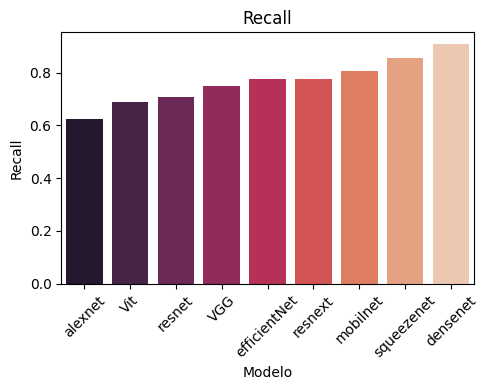

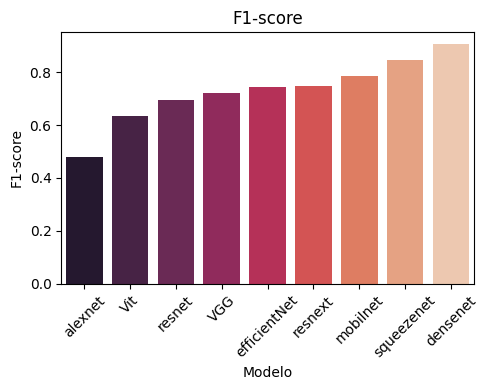

In [41]:
import seaborn as sns
metrics = ['Tempo de Treinamento (s)', 'Acurácia', 'Precisão', 'Recall',
       'F1-score']

for metrica in metrics:
    order = df.sort_values(by=metrica)["Modelo"]
    plt.figure(figsize=(5, 4))
    sns.barplot(x="Modelo", y=metrica, data=df, order=order, palette="rocket")
    plt.xticks(rotation=45)
    plt.title(metrica)
    plt.tight_layout()
    plt.show()

#### Observando somente os três escolhidos

In [44]:
# Filtrando o DataFrame para incluir apenas os modelos DenseNet, ResNet e SqueezeNet
escolhidos = df[df["Modelo"].isin(["densenet", "resnet", "squeezenet"])]
escolhidos

,Modelo,Tempo de Treinamento (s),Acurácia,Precisão,Recall,F1-score
0,resnet,178.40,0.7067,0.8004,0.7067,0.6960
3,densenet,540.27,0.9071,0.9084,0.9071,0.9057
7,squeezenet,120.56,0.8558,0.8748,0.8558,0.8476


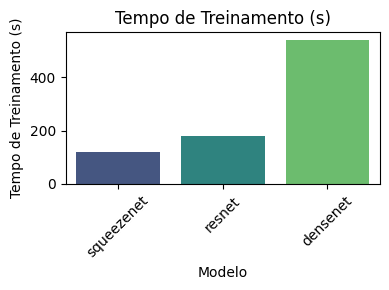

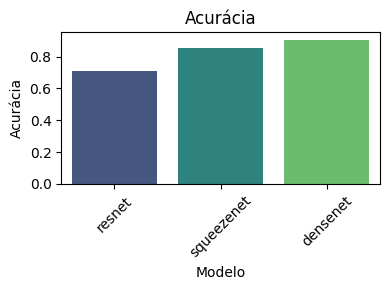

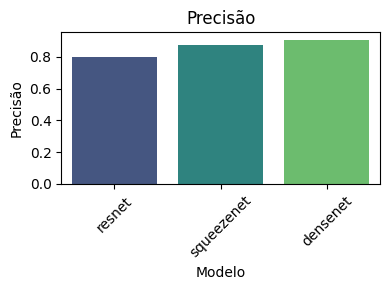

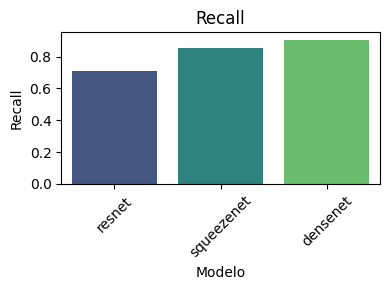

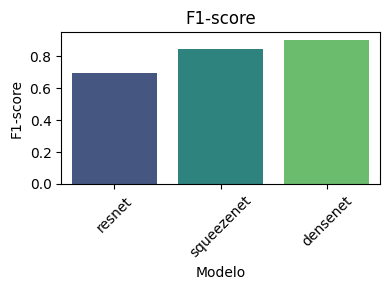

In [45]:
for metrica in metrics:
    order = escolhidos.sort_values(by=metrica)["Modelo"]
    plt.figure(figsize=(4, 3))
    sns.barplot(x="Modelo", y=metrica, data=escolhidos, order=order, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(metrica)
    plt.tight_layout()
    plt.show()

### Tentativa de melhorar o SqueezeNet e o Densenet

In [46]:
epocas= 10

In [47]:
# Carregar o modelo pré-treinado
squeezenet = models.squeezenet1_1(pretrained=True)

# Alterar a última camada para corresponder ao número de classes
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
squeezenet.num_classes = num_classes

# Definir a força da regularização L1 e L2 (alpha e beta)
l1_strength = 0.01
l2_strength = 0.01

# Adicionar a regularização L1 e L2 às camadas
for param in squeezenet.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

# Adicionar Dropout
dropout_prob = 0.1  # Probabilidade de dropout
squeezenet.classifier.add_module("dropout", nn.Dropout(p=dropout_prob))

# Adicionar camada fully connected após o dropout
squeezenet.classifier.add_module("final_fc", nn.Conv2d(num_classes, num_classes, kernel_size=(1, 1), stride=(1, 1)))

# Aplicar a regularização L1 e L2 às novas camadas
for param in squeezenet.classifier.final_fc.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

treinamento(squeezenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid po

Epoch [1/10] - Loss: 0.5321 - Accuracy: 0.7435 - Time: 11.36 seconds
Epoch [2/10] - Loss: 0.3638 - Accuracy: 0.7429 - Time: 10.05 seconds
Epoch [3/10] - Loss: 0.5896 - Accuracy: 0.7429 - Time: 10.16 seconds
Epoch [4/10] - Loss: 0.6045 - Accuracy: 0.7429 - Time: 10.53 seconds
Epoch [5/10] - Loss: 0.5832 - Accuracy: 0.7429 - Time: 10.47 seconds
Epoch [6/10] - Loss: 0.5750 - Accuracy: 0.7429 - Time: 10.41 seconds
Epoch [7/10] - Loss: 0.5718 - Accuracy: 0.7429 - Time: 10.17 seconds
Epoch [8/10] - Loss: 0.5706 - Accuracy: 0.7429 - Time: 10.20 seconds
Epoch [9/10] - Loss: 0.5702 - Accuracy: 0.7429 - Time: 10.93 seconds
Epoch [10/10] - Loss: 0.5701 - Accuracy: 0.7429 - Time: 10.34 seconds
Total training time: 104.63 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.6250
Precision: 0.3906
Recall: 0.6250
F1-score: 0.4808

Confusion Matrix:
[[  0 234]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       234
     class_1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA


In [48]:
# Carregar o modelo pré-treinado DenseNet
densenet = models.densenet121(pretrained=True)
num_ftrs = densenet.classifier.in_features
num_classes = 2
densenet.classifier = nn.Linear(num_ftrs, num_classes)

# Definir a força da regularização L1 e L2 (alpha e beta)
l1_strength = 0.01
l2_strength = 0.01

# Adicionar a regularização L1 e L2 às camadas do modelo
for param in densenet.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

# Adicionar Dropout
dropout_prob = 0.1  # Probabilidade de dropout
densenet.classifier.add_module("dropout", nn.Dropout(p=dropout_prob))

# Chamar a função de treinamento com o modelo modificado
treinamento(densenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potent

Epoch [1/10] - Loss: 0.1012 - Accuracy: 0.9620 - Time: 53.84 seconds
Epoch [2/10] - Loss: 0.0703 - Accuracy: 0.9762 - Time: 53.94 seconds
Epoch [3/10] - Loss: 0.0477 - Accuracy: 0.9820 - Time: 54.34 seconds
Epoch [4/10] - Loss: 0.0363 - Accuracy: 0.9872 - Time: 53.80 seconds
Epoch [5/10] - Loss: 0.0507 - Accuracy: 0.9808 - Time: 53.95 seconds
Epoch [6/10] - Loss: 0.0378 - Accuracy: 0.9860 - Time: 53.98 seconds
Epoch [7/10] - Loss: 0.0332 - Accuracy: 0.9879 - Time: 54.27 seconds
Epoch [8/10] - Loss: 0.0264 - Accuracy: 0.9904 - Time: 53.95 seconds
Epoch [9/10] - Loss: 0.0287 - Accuracy: 0.9891 - Time: 54.12 seconds
Epoch [10/10] - Loss: 0.0224 - Accuracy: 0.9931 - Time: 53.86 seconds
Total training time: 540.05 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.7612
Precision: 0.8272
Recall: 0.7612
F1-score: 0.7246

Confusion Matrix:
[[ 85 149]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.36      0.53       234
     class_1       0.72      1.00      0.84       390

    accuracy                           0.76       624
   macro avg       0.86      0.68      0.69       624
weighted avg       0.83      0.76      0.72       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True cl

# Adicionando data augmentation as imagens

In [49]:
import torchvision.transforms as transforms

# Lista de diretórios de origem
lista = ['/content/test_resized/NORMAL', '/content/test_resized/PNEUMONIA',
         '/content/train_resized/NORMAL', '/content/train_resized/PNEUMONIA',
         '/content/val_resized/NORMAL', '/content/val_resized/PNEUMONIA']

# Transformações de data augmentation
data_augmentation_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Iterar sobre os diretórios de origem
for source_directory in lista:
    # Criação da pasta de destino
    destination_directory = source_directory.replace("_resized", "_augmented")
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Aplicar transformações de data augmentation
            augmented_img = data_augmentation_transforms(img)

            destination_path = os.path.join(destination_directory, filename)
            torchvision.utils.save_image(augmented_img, destination_path)

    print(f"Imagens aumentadas e salvas na pasta {destination_directory}.")


Imagens aumentadas e salvas na pasta /content/test_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/test_augmented/PNEUMONIA.
Imagens aumentadas e salvas na pasta /content/train_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/train_augmented/PNEUMONIA.
Imagens aumentadas e salvas na pasta /content/val_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/val_augmented/PNEUMONIA.


In [51]:
# Caminhos para os dados
train_data_dir = '/content/train_resized'
test_data_dir = '/content/test_resized'

# Transformações para treinamento e teste
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        transforms.ToTensor()
    ]),
}

# Carregar dados de treinamento e teste
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=data_transforms['test'])

# Aplicar as mesmas transformações de data augmentation ao conjunto de treinamento original
augmented_train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_augmentation_transforms)

# Combinar os conjuntos de treinamento originais e aumentados
combined_train_dataset = torch.utils.data.ConcatDataset([train_dataset, augmented_train_dataset])

# Carregadores de dados
batch_size = 32
train_loader = DataLoader(combined_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Obter as classes e seus índices
class_names = train_dataset.classes
class_indices = train_dataset.class_to_idx

# Rótulos de teste filtrados
filtered_test_labels = test_dataset.targets

print("Classes:", class_names)
print("Class Indices:", class_indices)
print('')

Classes: ['NORMAL', 'PNEUMONIA']
Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [52]:
epocas=10
num_classes=2
# Carregar o modelo pré-treinado
squeezenet = models.squeezenet1_1(pretrained=True)

# Alterar a última camada para corresponder ao número de classes
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
squeezenet.num_classes = num_classes

# Definir a força da regularização L1 e L2 (alpha e beta)
l1_strength = 0.01
l2_strength = 0.01

# Adicionar a regularização L1 e L2 às camadas
for param in squeezenet.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

# Adicionar Dropout
dropout_prob = 0.1  # Probabilidade de dropout
squeezenet.classifier.add_module("dropout", nn.Dropout(p=dropout_prob))

# Adicionar camada fully connected após o dropout
squeezenet.classifier.add_module("final_fc", nn.Conv2d(num_classes, num_classes, kernel_size=(1, 1), stride=(1, 1)))

# Aplicar a regularização L1 e L2 às novas camadas
for param in squeezenet.classifier.final_fc.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

treinamento(squeezenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.



Epoch [1/10] - Loss: 0.4660 - Accuracy: 0.7840 - Time: 38.28 seconds
Epoch [2/10] - Loss: 0.3408 - Accuracy: 0.8515 - Time: 36.39 seconds
Epoch [3/10] - Loss: 0.3173 - Accuracy: 0.8709 - Time: 36.70 seconds
Epoch [4/10] - Loss: 0.3092 - Accuracy: 0.8750 - Time: 37.30 seconds
Epoch [5/10] - Loss: 0.2951 - Accuracy: 0.8788 - Time: 37.46 seconds
Epoch [6/10] - Loss: 0.2789 - Accuracy: 0.8859 - Time: 37.77 seconds
Epoch [7/10] - Loss: 0.2669 - Accuracy: 0.8903 - Time: 40.55 seconds
Epoch [8/10] - Loss: 0.2676 - Accuracy: 0.8900 - Time: 37.00 seconds
Epoch [9/10] - Loss: 0.2570 - Accuracy: 0.8991 - Time: 36.70 seconds
Epoch [10/10] - Loss: 0.2402 - Accuracy: 0.9046 - Time: 37.04 seconds
Total training time: 375.20 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8429
Precision: 0.8584
Recall: 0.8429
F1-score: 0.8344

Confusion Matrix:
[[146  88]
 [ 10 380]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.94      0.62      0.75       234
     class_1       0.81      0.97      0.89       390

    accuracy                           0.84       624
   macro avg       0.87      0.80      0.82       624
weighted avg       0.86      0.84      0.83       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True

In [53]:
densenet = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
num_ftrs = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_ftrs, num_classes)

treinamento(densenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [1/10] - Loss: 0.2602 - Accuracy: 0.8886 - Time: 107.40 seconds
Epoch [2/10] - Loss: 0.1831 - Accuracy: 0.9262 - Time: 107.97 seconds
Epoch [3/10] - Loss: 0.1528 - Accuracy: 0.9393 - Time: 107.93 seconds
Epoch [4/10] - Loss: 0.1517 - Accuracy: 0.9384 - Time: 108.13 seconds
Epoch [5/10] - Loss: 0.1354 - Accuracy: 0.9460 - Time: 107.49 seconds
Epoch [6/10] - Loss: 0.1276 - Accuracy: 0.9509 - Time: 107.89 seconds
Epoch [7/10] - Loss: 0.1355 - Accuracy: 0.9463 - Time: 107.37 seconds
Epoch [8/10] - Loss: 0.1224 - Accuracy: 0.9525 - Time: 107.52 seconds
Epoch [9/10] - Loss: 0.1152 - Accuracy: 0.9543 - Time: 107.53 seconds
Epoch [10/10] - Loss: 0.1178 - Accuracy: 0.9525 - Time: 107.40 seconds
Total training time: 1076.64 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8109
Precision: 0.8523
Recall: 0.8109
F1-score: 0.7920

Confusion Matrix:
[[117 117]
 [  1 389]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.50      0.66       234
     class_1       0.77      1.00      0.87       390

    accuracy                           0.81       624
   macro avg       0.88      0.75      0.77       624
weighted avg       0.85      0.81      0.79       624

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMO

In [16]:
# Tentando mais data augmentation
import os
import torchvision.transforms as transforms
import torchvision.utils
from PIL import Image

# Lista de diretórios de origem
lista = ['/content/test_resized/NORMAL', '/content/test_resized/PNEUMONIA',
         '/content/train_resized/NORMAL', '/content/train_resized/PNEUMONIA',
         '/content/val_resized/NORMAL', '/content/val_resized/PNEUMONIA']

# Transformações de data augmentation
data_augmentation_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),  # Aumentar o ângulo para 30 graus
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=0),  # Zoom e shift
    transforms.RandomVerticalFlip(),  # Flip vertical
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Iterar sobre os diretórios de origem
for source_directory in lista:
    # Criação da pasta de destino
    destination_directory = source_directory.replace("_resized", "_augmented")
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    for filename in os.listdir(source_directory):
        if filename.endswith(".jpeg") or filename.endswith(".png"):
            source_path = os.path.join(source_directory, filename)
            img = Image.open(source_path)

            # Aplicar transformações de data augmentation
            augmented_img = data_augmentation_transforms(img)

            destination_path = os.path.join(destination_directory, filename)
            torchvision.utils.save_image(augmented_img, destination_path)

    print(f"Imagens aumentadas e salvas na pasta {destination_directory}.")


Imagens aumentadas e salvas na pasta /content/test_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/test_augmented/PNEUMONIA.
Imagens aumentadas e salvas na pasta /content/train_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/train_augmented/PNEUMONIA.
Imagens aumentadas e salvas na pasta /content/val_augmented/NORMAL.
Imagens aumentadas e salvas na pasta /content/val_augmented/PNEUMONIA.


In [17]:
# Caminhos para os dados
train_data_dir = '/content/train_resized'
test_data_dir = '/content/test_resized'

# Transformações para treinamento e teste
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        transforms.ToTensor()
    ]),
}

# Carregar dados de treinamento e teste
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=data_transforms['test'])

# Aplicar as mesmas transformações de data augmentation ao conjunto de treinamento original
augmented_train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_augmentation_transforms)

# Combinar os conjuntos de treinamento originais e aumentados
combined_train_dataset = torch.utils.data.ConcatDataset([train_dataset, augmented_train_dataset])

# Carregadores de dados
batch_size = 32
train_loader = DataLoader(combined_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Obter as classes e seus índices
class_names = train_dataset.classes
class_indices = train_dataset.class_to_idx

# Rótulos de teste filtrados
filtered_test_labels = test_dataset.targets

print("Classes:", class_names)
print("Class Indices:", class_indices)
print('')

Classes: ['NORMAL', 'PNEUMONIA']
Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}



In [18]:
epocas=10
num_classes=2
# Carregar o modelo pré-treinado
squeezenet = models.squeezenet1_1(pretrained=True)

# Alterar a última camada para corresponder ao número de classes
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))
squeezenet.num_classes = num_classes

# Definir a força da regularização L1 e L2 (alpha e beta)
l1_strength = 0.01
l2_strength = 0.01

# Adicionar a regularização L1 e L2 às camadas
for param in squeezenet.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

# Adicionar Dropout
dropout_prob = 0.1  # Probabilidade de dropout
squeezenet.classifier.add_module("dropout", nn.Dropout(p=dropout_prob))

# Adicionar camada fully connected após o dropout
squeezenet.classifier.add_module("final_fc", nn.Conv2d(num_classes, num_classes, kernel_size=(1, 1), stride=(1, 1)))

# Aplicar a regularização L1 e L2 às novas camadas
for param in squeezenet.classifier.final_fc.parameters():
    param.data = param.data + l1_strength * param.data.sign() + l2_strength * param.data

treinamento(squeezenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:00<00:00, 84.8MB/s]


Epoch [1/10] - Loss: 0.4857 - Accuracy: 0.7417 - Time: 32.68 seconds
Epoch [2/10] - Loss: 0.3760 - Accuracy: 0.8024 - Time: 26.74 seconds
Epoch [3/10] - Loss: 0.3352 - Accuracy: 0.8193 - Time: 26.00 seconds
Epoch [4/10] - Loss: 0.3077 - Accuracy: 0.8264 - Time: 26.37 seconds
Epoch [5/10] - Loss: 0.2903 - Accuracy: 0.8448 - Time: 27.03 seconds
Epoch [6/10] - Loss: 0.2718 - Accuracy: 0.8850 - Time: 26.02 seconds
Epoch [7/10] - Loss: 0.2524 - Accuracy: 0.8923 - Time: 28.71 seconds
Epoch [8/10] - Loss: 0.2466 - Accuracy: 0.8950 - Time: 26.94 seconds
Epoch [9/10] - Loss: 0.2468 - Accuracy: 0.8973 - Time: 26.05 seconds
Epoch [10/10] - Loss: 0.2368 - Accuracy: 0.9022 - Time: 25.83 seconds
Total training time: 272.37 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8013
Precision: 0.8346
Recall: 0.8013
F1-score: 0.7825

Confusion Matrix:
[[116 118]
 [  6 384]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      0.50      0.65       234
     class_1       0.76      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.76       624
weighted avg       0.83      0.80      0.78       624

Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, T

In [19]:
densenet = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
num_ftrs = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_ftrs, num_classes)

treinamento(densenet, epocas=epocas, train_loader=train_loader, test_loader=test_loader, filtered_test_labels=filtered_test_labels)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 82.9MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch [1/10] - Loss: 0.2515 - Accuracy: 0.8917 - Time: 108.82 seconds
Epoch [2/10] - Loss: 0.2048 - Accuracy: 0.9126 - Time: 107.29 seconds
Epoch [3/10] - Loss: 0.1749 - Accuracy: 0.9293 - Time: 107.14 seconds
Epoch [4/10] - Loss: 0.1686 - Accuracy: 0.9325 - Time: 107.31 seconds
Epoch [5/10] - Loss: 0.1628 - Accuracy: 0.9348 - Time: 107.35 seconds
Epoch [6/10] - Loss: 0.1506 - Accuracy: 0.9401 - Time: 107.52 seconds
Epoch [7/10] - Loss: 0.1449 - Accuracy: 0.9425 - Time: 107.62 seconds
Epoch [8/10] - Loss: 0.1347 - Accuracy: 0.9452 - Time: 107.02 seconds
Epoch [9/10] - Loss: 0.1361 - Accuracy: 0.9471 - Time: 107.11 seconds
Epoch [10/10] - Loss: 0.1325 - Accuracy: 0.9473 - Time: 107.28 seconds
Total training time: 1074.47 seconds
Completed training



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Accuracy: 0.8285
Precision: 0.8633
Recall: 0.8285
F1-score: 0.8139

Confusion Matrix:
[[128 106]
 [  1 389]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.55      0.71       234
     class_1       0.79      1.00      0.88       390

    accuracy                           0.83       624
   macro avg       0.89      0.77      0.79       624
weighted avg       0.86      0.83      0.81       624

Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: NORMAL, True class: NORMAL
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class: PNEUMONIA
Predicted class: PNEUMONIA, True class